In [1]:
! mkdir data && cd data && wget https://gss.norc.org/Documents/sas/2022.zip && unzip 2022.zip

--2024-02-29 12:41:26--  https://gss.norc.org/Documents/sas/2022.zip
Resolving gss.norc.org (gss.norc.org)... 199.102.80.194
Connecting to gss.norc.org (gss.norc.org)|199.102.80.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12288354 (12M) [application/x-zip-compressed]
Saving to: ‘2022.zip’

2022.zip            100%[===================>]  11.72M  3.98MB/s    in 2.9s    

2024-02-29 12:41:30 (3.98 MB/s) - ‘2022.zip’ saved [12288354/12288354]

Archive:  2022.zip
  inflating: 2022 GSS Mode Sensitivity Note v1.pdf  
  inflating: formats.sas7bcat        
  inflating: GSS 2022 Codebook.pdf   
  inflating: gss2022.sas7bdat        
  inflating: ReadMe.txt              
  inflating: Release Notes 7222.pdf  


In [3]:
#importing the data
import pandas as pd
df = pd.read_sas("data/gss2022.sas7bdat")

In [4]:
#Looking at the data
print(df.head())
print(df.describe())

     YEAR   ID  WRKSTAT  HRS1  HRS2  EVWORK  WRKSLF   OCC10  PRESTG10  \
0  2022.0  1.0      1.0  40.0   NaN     NaN     2.0   430.0      39.0   
1  2022.0  2.0      5.0   NaN   NaN     1.0     2.0    50.0      53.0   
2  2022.0  3.0      1.0  52.0   NaN     NaN     2.0  4610.0      48.0   
3  2022.0  4.0      3.0   NaN  25.0     NaN     2.0  4120.0      34.0   
4  2022.0  5.0      8.0   NaN   NaN     1.0     2.0  7330.0      38.0   

   INDUS10  ...  BABIES_EXP  PRETEEN_EXP  ADULTS_EXP  CHILDS_EXP  CHILDSINHH  \
0   6290.0  ...         NaN          NaN         NaN         NaN         0.0   
1   6695.0  ...         NaN          NaN         NaN         NaN         0.0   
2   8290.0  ...         0.0          0.0         3.0         0.0         NaN   
3   8660.0  ...         NaN          NaN         NaN         NaN         0.0   
4   3390.0  ...         0.0          0.0         3.0         0.0         NaN   

   ADULTSINHH  WTSSPS_NEA  WTSSNRPS_NEA  WTSSPS_NEXT  WTSSNRPS_NEXT  
0         

In [5]:
#Getting only the variables we care about from dataframe into interested dataframe
idf = df[['ID','PRESTG10','RLOOKS','OWNGUN']]
print(idf.shape)
print(idf.head())
print(idf.describe())

(3544, 4)
    ID  PRESTG10  RLOOKS  OWNGUN
0  1.0      39.0     3.0     2.0
1  2.0      53.0     NaN     2.0
2  3.0      48.0     NaN     2.0
3  4.0      34.0     NaN     2.0
4  5.0      38.0     NaN     2.0
                ID     PRESTG10       RLOOKS       OWNGUN
count  3544.000000  3326.000000  1672.000000  2313.000000
mean   1772.535553    44.924835     3.327751     1.691310
std    1023.268418    13.571545     0.787542     0.501553
min       1.000000    16.000000     1.000000     1.000000
25%     886.750000    35.000000     3.000000     1.000000
50%    1772.500000    45.000000     3.000000     2.000000
75%    2658.250000    54.000000     4.000000     2.000000
max    3545.000000    80.000000     5.000000     3.000000


In [6]:
#DATAFRAME FOR GRAPH #1, THE PRESTIGE BOX PLOTS PER ATTRACTIVENESS LEVEL
padf = idf[['PRESTG10','RLOOKS']]
#Do data cleaning, then create the graph on the padf dataframe. Insert cells below this one when you're working on it. 

In [7]:
#DATAFRAME FOR GRAPH #2, THE GUN OWNERSHIP % PER ATTRACTIVENESS LEVEL
agdf = idf[['RLOOKS','OWNGUN']]
#Do data cleaning, then create the graph on the agdf dataframe. Insert cells below this one when you're working on it. 

In [10]:
#DATAFRAME FOR GRAPH #3, THE PRESTIGE DISTRIBUTION GRAPH BY GUN OWNERSHIP
pgdf = idf[['PRESTG10','OWNGUN']]

In [21]:
#looking at the range of variables for each type
print(pgdf['PRESTG10'].value_counts())
print(pgdf['OWNGUN'].value_counts())
#looking back at the codebook, we know that PRESTG10 is that when the respondents had to rate the prestige of their job out of 100
#we can also know that OWNGUN variable 1 means yes, 2 means no, and 3 means no response

35.0    222
31.0    190
48.0    168
38.0    151
61.0    134
64.0    126
39.0    123
47.0    120
45.0    118
53.0    116
28.0    115
60.0    114
25.0     99
50.0     85
32.0     79
44.0     75
49.0     73
46.0     67
33.0     66
51.0     66
24.0     62
36.0     59
65.0     54
43.0     52
59.0     47
42.0     46
34.0     45
37.0     41
62.0     38
69.0     38
21.0     36
40.0     36
63.0     35
72.0     34
52.0     34
55.0     28
74.0     28
54.0     27
29.0     26
41.0     23
80.0     21
22.0     21
70.0     19
66.0     17
58.0     17
27.0     17
73.0     15
26.0     15
56.0     14
57.0     11
17.0     11
30.0      9
67.0      9
75.0      8
71.0      7
16.0      6
20.0      5
18.0      5
68.0      2
23.0      1
Name: PRESTG10, dtype: int64
2.0    1511
1.0     758
3.0      44
Name: OWNGUN, dtype: int64


In [20]:
#checking out the number of null values for each column.
print(pgdf.shape)
print(pgdf['PRESTG10'].isnull().sum())
print(pgdf['OWNGUN'].isnull().sum())
#not a lot of nulls for PRESTG10, but a lot of them for gun ownership. 

(3544, 2)
218
1231


In [38]:
#Since we can't extrapolate & replace null values from other variables, we're just going to drop every row that is either null, or didn't respond on OWNGUN
pgdf.dropna(subset=['PRESTG10'], inplace=True)
pgdf.dropna(subset=['OWNGUN'], inplace=True)
pgdf = pgdf[~(pgdf['OWNGUN'] == 3)]
#While we're at it, we'll replace 1 & 2 in OWNGUN with True and False. Easier for the reader to understand. 
pgdf['Gun_Owner'] = pgdf['OWNGUN'].map({1: True, 2: False})

In [39]:
#checking the results of our cleaning... still have a good majority of our rows left. 
print(pgdf.shape)
print(pgdf['PRESTG10'].isnull().sum())
print(pgdf['OWNGUN'].isnull().sum())

(2134, 3)
0
0


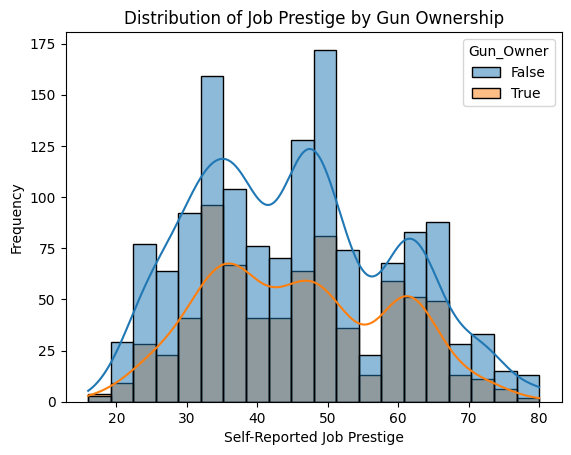

In [43]:
#actually creating the graph
import seaborn as sns
import matplotlib.pyplot as plt
#plots both histogram & kernel density
sns.histplot(data=pgdf, x='PRESTG10', hue='Gun_Owner', multiple='layer', kde=True)

plt.xlabel('Self-Reported Job Prestige')
plt.ylabel('Frequency')
plt.title('Distribution of Job Prestige by Gun Ownership')

# Show the plot
plt.show()

In [ ]:
# We can see very similar shapes in the kernel density distribution, with the same peaks and valleys in frequencyof job prestige for both gun owners and non gun owners. 
#We can also see that there are a lot more non gun owners than gun owners: almost twice as many non gun owners for every gun owner at every level of job prestige. 